# Bakery Simulation - Making Cookies

Data 604 - Modeling & Simulation
Summer 2020

Author: Devin Teran


## The Problem:
If you were to open a bakery, how would you know what size appliances to purchase for your bakery?  I'm going to simulate how different size appliances will effect the budget, efficiencys and profit of a small cookie shop.  Would an aspiring bakery be able to get away with using the oven found in there own home to get started?  Or is a commercial oven really necessary?  How many hours will it take to make 100 cookies?  What about 400 cookies ?  And finally, if you're opening a bakery, how should you expect to pay employees each day? 

These are all questions I will explore.  These answers are absolutely vital to a new business.  In order to open a bakery, you'll want machines that can crank out cookies without going bankrupt before opening day. You're going to want to buy machines that can handle a growing business and last a long a long time and will be a good investment for your business.  Resources that go into setting up a business are a large initial investment, which can make or break a company.  

## Flow Chart

The flow chart for baking cookies is quite simple.  We start with a stand mixer which will create the cookie dough.  Once the cookie dough is formed, we check if the oven is open.  If there are no other cookies in the oven, we move the cookie dough from the mixer to the oven.  If the oven is currently occupied, the cookie dough must wait.  

In our analysis later, we will have a timer, 'Wait_Mixer' to analyze how often the oven is slowing down the cookie making process. It's important to know where bottlenecks are occuring in your system if anywhere.

We're going to simplify this process and ignore obvious other resources in the cooking process like cooling racks, filling cookie sheets, etc. 

 ![title](CookieBakingWorkflow.png)

## Simulation

#### Libraries
The following libraries are necessary for this project:

In [46]:
# Configure Jupyter so figures appear in the notebook
%matplotlib inline

# Configure Jupyter to display the assigned value after an assignment
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'

# import functions from the modsim.py module
from modsim import *

# import necessary libraries
import pandas as p
import numpy as np
import math
import random


#### Resources
Any restaurant or business is going to need machines and appliances before opening up shop.  In a bakery, we could consider these to be any cooking supplies needed to bake cookies.  In this simulation we are going to focus on the stand mixer used to make cookie dough and the oven used to bake the cookie dough into cookies. 

Other resources that this study will not focus on include baking sheets, display cases, cooling racks, freezers, etc.  These are items that could be added in a longer term research project that would make the system more realistic.

In [47]:
class Resource:
    ''' Make a System Object (e.g. think appliance or cooking tool in a kitchen)'''
    def __init__(self, name, run_time, time_left, current_capacity, max_capacity,purchase_cost,wait_time):
        self.name = name                          #name of restaurant
        self.run_time = run_time                  #the time is takes to complete step (e.g. mix cookie dough)
        self.time_left = time_left                #time left to complete step (e.g. mix cookie dough)
        self.current_capacity = current_capacity  #how many cookies are in resource now
        self.max_capacity = max_capacity          #max number cookies resource can handle
        self.purchase_cost = purchase_cost        #purchase cost
        self.wait_time = wait_time                #how long the system was stalled because cookies couldn't 
                                                  #move to next step due to capacity limits e.g. the oven can hold
                                                  #24 cookies but my mixer just made 48 cookies worth of dough
    
    def update_timer(self):
        #Validation
        #print('Updating timer.')
     
        if (self.time_left == 0):
            self.time_left = self.run_time    
        else:                      
            self.time_left = self.time_left - 1

'''
#Validation:
pan_ss = Resource('Stainless Steel Pan',10,0,0,12,0)     #10 minutes to fill a pan with a max of 12 cookies
oven_ss = Resource('Stainless Steel Oven',12,0,0,24,0)   #12 minutes to bake a max of 24 cookies
restaurant = Kitchen('Devins Amazing Bakery',[pan_ss,oven_ss],48,0,0)
'''

"\n#Validation:\npan_ss = Resource('Stainless Steel Pan',10,0,0,12,0)     #10 minutes to fill a pan with a max of 12 cookies\noven_ss = Resource('Stainless Steel Oven',12,0,0,24,0)   #12 minutes to bake a max of 24 cookies\nrestaurant = Kitchen('Devins Amazing Bakery',[pan_ss,oven_ss],48,0,0)\n"

#### Move Cookies Class
This class will be used to move the cookies from resource to resource.  In our system, cookies will move from the stand mixer, which contains the cookie dough, and into the oven.

In [48]:
class Move_Cookies:
    ''' Class to move cookies from one system to the next'''
    def __init__(self, system1, system2):
        self.system1 = system1
        self.system2 = system2
     
    def cookies_next_step(self,system1,system2):
        ''' Check if the cookies are ready to move from system1 to system2
        
        System1
        System2
        
        Return boolean
        '''
        #Validation     
        #print("Check if cookies are ready to move from system1 to system2.")
        if (system1.time_left == 0 and system1.current_capacity > 0 and system2.time_left == 0 and system2.current_capacity == 0):
            return True
        else:
            return False
        
    def move_cookies(self,system1,system2):
        ''' Move cookies from system1 to system2
        
        System1
        System2
        '''
        cookies_to_move = system2.max_capacity if (system1.current_capacity>system2.max_capacity) else system1.current_capacity
        system2.current_capacity = cookies_to_move
        system2.update_timer()
        system1.current_capacity = system1.current_capacity - cookies_to_move

        #Validation
        #print(str(cookies_to_move) + ' cookies were moved.')

'''
#Validation
oven = Resource('oven',10,0,0,12,0)                   
cooling_rack = Resource('cooling_rack',12,0,0,24,0) 
m = Move_Cookies(oven,cooling_rack)
print(m.cookies_next_step(oven,cooling_rack))

oven1 = Resource('oven',10,0,2,12,0)                   
cooling_rack1 = Resource('cooling_rack',12,0,0,24,0) 
m = Move_Cookies(oven1,cooling_rack1)
print(m.cookies_next_step(oven1,cooling_rack1))

print(str(oven1.current_capacity))
print(str(cooling_rack1.current_capacity))
m.move_cookies(oven1,cooling_rack1)
print(str(oven1.current_capacity))
print(str(cooling_rack1.current_capacity))
print(str(cooling_rack1.time_left))
'''    

"\n#Validation\noven = Resource('oven',10,0,0,12,0)                   \ncooling_rack = Resource('cooling_rack',12,0,0,24,0) \nm = Move_Cookies(oven,cooling_rack)\nprint(m.cookies_next_step(oven,cooling_rack))\n\noven1 = Resource('oven',10,0,2,12,0)                   \ncooling_rack1 = Resource('cooling_rack',12,0,0,24,0) \nm = Move_Cookies(oven1,cooling_rack1)\nprint(m.cookies_next_step(oven1,cooling_rack1))\n\nprint(str(oven1.current_capacity))\nprint(str(cooling_rack1.current_capacity))\nm.move_cookies(oven1,cooling_rack1)\nprint(str(oven1.current_capacity))\nprint(str(cooling_rack1.current_capacity))\nprint(str(cooling_rack1.time_left))\n"

#### State System
This function allows us to create system and state variables, which will be used throughout the analysis.

In [49]:
def make_system(params):#, name, cookies_to_make):
    """Makes a System object with the given parameters.
    
    params: 
        mixer: A Resource which is first in the cookie backing process
        oven: A Resource which accepts cookies from the mixer
        cookies_to_make: An integer which represents how many cookies a bakery needs to produce in a single day
    
    Cookies_Done:  An integer, how many cookies have completed baking
    Cookies_in_Process: An integer, how many cookies are in the mixer or oven but have not completed baking
    Time_To_Bake: An integer, how many minutes did it take to bake the daily cookie count for the 
                  restaurant (cookies_to_make).  This is 0 if the cookies_to_make value hasn't been reached yet.
    Wait_Mixer:  An integer, How many minutes did cookies sit in the mixer because the oven was full?  This 
                 signals that the bakery might want to consider a larger oven.
    Wait_Oven: An integer, How many minutes did the cookies sit in the oven because the next step was full. 
               This should be 0 since the oven is the last step in the proces
    Employee_Costs: An integer, How much does the bakery have to pay employees in a day?
    Resource_Costs: An integer, How much do the resources cost?  This is a one time initial investment
    Costs: An integer, This is the Employee_Costs plus the Resource_Costs
    
    returns: System object
    """
    
    mixer,oven,cookies_to_make = params
    
    init = State(Cookies_Done=0,Cookies_in_Process=0,Time_To_Bake=0,Wait_Mixer=0,Wait_Oven=0,Employee_Costs=0,Resource_Costs=0,Cost=0)
    
    return System(params,
                  init=init,
                  t_0=0, t_end=260,dt=1)

#### Employee Payroll Expenses
Smaller stand mixers may be less expensive to purchase initially but they take longer to bake a single batch of cookies.  

This will inevitably increase the time to bake the same number of cookies, which will drive up
the bakery payroll.  Payroll expenses are a major variable to take into account when opening a bakery.

In [5]:
def calculate_employee_costs(t):
    '''Calculate the amount of money spent to pay employees
    assuming the employees make $14.09/hr per LinkedIn article:
    https://www.indeed.com/career/baker/salaries/MA#:~:text=The%20average%20salary%20for%20a%20Baker%20is%20%2414.08,satisfaction%20and%20where%20you%20could%20earn%20the%20most.
    
    returns: integer
    '''
    employee_payroll = math.ceil(int(t)/60) * 14.09

    return employee_payroll


#### Update Function
This will be used to update our simluation and keep track of how many cookies have been baked so far in the bakery.  A few things are moving around in this function.

In [90]:
def update_func(state,t,system):
    """Update the number of baked cookies in a Kitchen.
    
    state: A state 
    t: An integer, represents a minute in a day.  
    System: the bakery system
    
    returns state
    """
    if (state.Time_To_Bake == 0):
        cookiesDone = False
    else:
        cookiesDone = True
        
    moveCookies = False
    m = Move_Cookies(system.mixer,system.oven)
    
    #if mixer is empty and kitchen hasnt made enough cookies, start mixer
    if (((state.Cookies_Done - state.Cookies_in_Process) < system.cookies_to_make) and (system.mixer.current_capacity == 0)):
        #Validation
        #print('Start a new batch of cookies')
        system.mixer.update_timer() #start the mixer
        system.mixer.current_capacity = (system.cookies_to_make - state.Cookies_Done - state.Cookies_in_Process) if (system.mixer.max_capacity + state.Cookies_Done + state.Cookies_in_Process) > system.cookies_to_make else system.mixer.max_capacity


    elif (m.cookies_next_step(system.mixer,system.oven) == True):
        #Validation
        #print('Cookies are ready to move.')
        moveCookies = True
    
    elif ((system.mixer.time_left == 0 and system.mixer.current_capacity > 0) and (m.cookies_next_step(system.mixer,system.oven) == False)):
        #Validation
        #print('Cookies are ready to move but oven is busy.')
        state.Wait_Mixer = state.Wait_Mixer + 1
        
    else:
        system.mixer.update_timer()
    
    #Validation
    #print('There are ' + str(system.mixer.current_capacity) + ' cookies in the system.mixer.')
    #print('The time left is ' + str(system.mixer.time_left))
    #print('There are ' + str(oven.current_capacity) + ' cookies in the oven.')
    #print('The time left is ' + str(oven.time_left))
    #print('There are ' + str(state.cookies_done) + ' cookies baked.')
       
    if (moveCookies == True):
        #Validation
        #print('Cookies are ready to move.')
        
        m.move_cookies(system.mixer,system.oven)
    elif (system.oven.current_capacity > 0 and system.oven.time_left == 0):
        #Validation
        #print('Cookies are done.')
        state.Cookies_Done = state.Cookies_Done + system.oven.current_capacity 
        #print('Cookies Done After' + str(state.Cookies_Done))
        state.Cookies_in_Oven = 0
        system.oven.current_capacity = 0
    elif (system.oven.current_capacity > 0):
        #Validation
        #print('Update timer.')
        system.oven.update_timer()
    else:
        pass
    
    state.Cookies_in_Process = system.mixer.current_capacity + system.oven.current_capacity
    
    if (state.Cookies_Done < system.cookies_to_make):
        #Validation
        #print("We're still baking!")
        #Assume paying an employee costs $14.09/hr and we need 1 employee
        state.Employee_Costs = calculate_employee_costs(t)
        state.Resource_Costs = system.mixer.purchase_cost + system.oven.purchase_cost
        state.Cost = state.Employee_Costs + state.Resource_Costs
    
    if ((state.Cookies_Done == system.cookies_to_make) and cookiesDone == False and state.Time_To_Bake == 0):
        state.Time_To_Bake = t
        cookiesDone == True
        
    return state



#### Running Our Simulation
Here we will be running the update_func() which calculated the number of cookies baked so far.

In [7]:
#run the business of making cookies for t minutes
def run_simulation(system,update_func):
    ''' Runs a simulation of a kitchen baking cookies.
    
    Add a TimeSeries to the System: results
    
    update_func: function that the number of cookies baked'''
    init = system.init
    t_0, t_end, dt = system.t_0, system.t_end, system.dt
    
    frame = TimeFrame(columns=init.index)
    frame.row[t_0] = init
    ts = linrange(t_0, t_end, dt)
    
    for t in ts:
        
        frame.row[t+dt] = update_func(init,t,system)
        
    return frame

#### Initializing Resources
Each resource has a:
* run time - how long does the oven taken to bake a batch of cookies?
* time left - a timer will count down there to let us know when the oven or mixer is done (e.g. time_left = 0)
* current capacity - how many cookies are in the mixer?
* max capacity - how many cookies can this resource hold?
* purchase cost - what's the initial investment to purchase this resource?
* wait_time - does this resource have to wait for other resources?  this will help us find bottlenecks in our bakery


I verified the details in this section of the code by researching many online recipes to get a general idea of how long cookies take to cook.  I also validated with personal recipes, since I've made a lot of cookies throughout my lifetime.  Many of the prices were found on HomeDepot.com (see resources section below).  The mixers are all of the KitchenAid brand to keep variables as consistent as possible.

In [8]:
#Mixers
mixer_4_point_5 = Resource("mixer_home",10,0,0,60,259.99,0) #4.5 quart, 5dozen/60cookies
mixer_5 = Resource("mixer_home",10,0,0,72,429.99,0) #5 quart, 6dozen/72cookies
mixer_6 = Resource("mixer_home",10,0,0,84,499.99,0) #6 quart, 7dozen/84cookies

mixer_10 = Resource("mixer_10",10,0,0,132,659.99,0)  #10 quart,11dozen/132cookies
mixer_20 = Resource("mixer_20",10,0,0,264,899.00,0)  #20 quart,22dozen/264cookies
mixer_30 = Resource("mixer_30",10,0,0,396,1999.99,0) #30 quart,33dozen/396dozen
mixer_40 = Resource("mixer_40",10,0,0,528,2799.99,0) #40 quart,44dozen/528dozen

#Ovens
oven_home  = Resource("oven_home",12,0,0,24,608.00,0) #half size sheet, 24 cookies total
oven_3_full = Resource("oven_home",12,0,0,108,2199.00,0) #3 full size sheets, 108 cookies total
oven_6_full = Resource("oven_home",12,0,0,216,4359.00,0) #6 full size sheets, 216 cookies total



This code was used to validate that the run_simulation functionw as working as expected.

In [9]:
#Testing the Run Simulation Function Results:
cookies_to_make = 60
params = Params(mixer = mixer_4_point_5,oven = oven_home,cookies_to_make = cookies_to_make)

system = make_system(params)

results = run_simulation(system,update_func)
results
results.tail(1)

,Cookies_Done,Cookies_in_Process,Time_To_Bake,Wait_Mixer,Wait_Oven,Employee_Costs,Resource_Costs,Cost
260,60,0,52,26,0,14,867,881


#### Sweeping Number of Baked Cookies

Here we are running the simulation a total of 20 iterations.  Each iteration increase the number of cookies made by 1 dozen.  I'm looking at different scenarios while baking between 5 to 20 dozen cookies because this is an accurate representation of what a small bakery would need to bake each day.

In [35]:
def sweep_Cost(mixer_in,oven_in,update_func):
    '''
    Run simulation through multiple iterations to update the number of baked cookies in a Bakery.
    
    mixer_in: a Resource, the mixer used by the system
    oven_in: a Resource, the oven used by the system
    update_func: a Function to update the 
    '''
    dozens = linrange(5,21,1)
    cookies_to_make = dozens * 12
    
    sweep_cost = pd.DataFrame(columns=['Cookies_Done','Wait_Mixer','Wait_Oven','Cost','Employee_Costs','Resource_Costs',"Time_To_Bake"])
        
    for i in cookies_to_make:
            
        params = Params(mixer = mixer_in,oven = oven_in,cookies_to_make = int(i))
        system = make_system(params)
        results = run_simulation(system,update_func)

        sweep_cost.loc[i] = [get_last_value(results.Cookies_Done),
                             get_last_value(results.Wait_Mixer),
                             get_last_value(results.Wait_Oven),
                             get_last_value(results.Cost),
                             get_last_value(results.Employee_Costs),
                             get_last_value(results.Resource_Costs),
                             get_last_value(results.Time_To_Bake)]
        
    return sweep_cost


#### Simulations:

#### 4.5 Quart Stand Mixer With at Home Oven
Here are the results for running a simulation with 5 to 20 dozen cookies to be made each day by the bakery.   This was completed using the 4.5 quart mixer and the average oven found in a home. 

Each row represents a simulation of baking X number of cookies (the bolded number on the far left of the dataframe below).

Some key takeaways are:
 * The initial cost of the resources makes up a large percentage of the total cost
 * As the number of cookies being baked increases, the time to bake the cookies and the amount the employee needs to be paid increases as well
 * The mixer is waiting almost 2 hours for the oven to finish baking!  This is clearly a bottleneck in the simulation

In [36]:
sweep_4_point_5_mixer = sweep_Cost(mixer_4_point_5,oven_home,update_func)


,Cookies_Done,Wait_Mixer,Wait_Oven,Cost,Employee_Costs,Resource_Costs,Time_To_Bake
60,60,26,0,881,14,867,42
72,72,28,0,881,14,867,56
84,84,28,0,881,14,867,59
96,96,41,0,895,28,867,76
108,108,41,0,895,28,867,71
120,120,54,0,895,28,867,91
132,132,56,0,895,28,867,103
144,144,56,0,895,28,867,104
156,156,69,0,895,28,867,119
168,168,69,0,895,28,867,112


#### 4.5 Quart Stand Mixer With Commercial Oven with 3 Racks
Now I'm running the same simulation with the same mixer but a larger commercial oven.

Some key takeaways are:
* The resource costs are signifcantly higher 
* The employee costs are less for large batches and the time to bake 240 cookies is over 100 minutes less.  This oven might be better in the long run if the bakery grows.  
* The mixer no longer is waiting on the oven to complete it's work

In [12]:
sweep_4_point_5_mixer_big_oven = sweep_Cost(mixer_4_point_5,oven_3_full,update_func)


,Cookies_Done,Wait_Mixer,Wait_Oven,Cost,Employee_Costs,Resource_Costs,Time_To_Bake
60,60,0,0,2472,14,2458,20
72,72,2,0,2472,14,2458,28
84,84,2,0,2472,14,2458,36
96,96,2,0,2472,14,2458,33
108,108,2,0,2472,14,2458,30
120,120,2,0,2472,14,2458,38
132,132,4,0,2472,14,2458,49
144,144,4,0,2472,14,2458,49
156,156,4,0,2472,14,2458,49
168,168,4,0,2472,14,2458,49


#### Mixer to Oven Bottleneck
With the average at home oven, the system is really held back and slowed down due to the small size of the oven.  An at home oven can hold 24 cookies while the commercial oven can hold 108 cookies.

If a baker is working out of their home and they don't have the inital costs of purchasing an average at home oven, the at home oven may be worth it.  If someone is setting up a new bakery, the smaller oven is a huge bottleneck that could cause major issues as the bakery operates.  The cookies spend over 100 minutes waiting for the oven when you reach 240 baked cookies at a time.  You'll likely be paying employees to stand around and wait in this scenario.

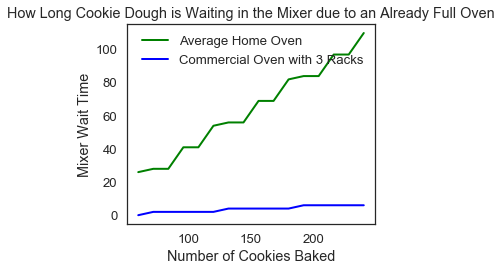

In [13]:
plot(sweep_4_point_5_mixer['Wait_Mixer'], color='green', label='Average Home Oven')
plot(sweep_4_point_5_mixer_big_oven['Wait_Mixer'], color='blue', label='Commercial Oven with 3 Racks')

decorate(xlabel='Number of Cookies Baked', 
         ylabel='Mixer Wait Time',
         title='How Long Cookie Dough is Waiting in the Mixer due to an Already Full Oven')

#### Cost to Bake Cookies with Different Ovens
It's clear that from the previous section, that there is an obvious bottleneck with the average at home oven, but the commercial oven is over $1000 more expensive.

This is a great question, that many bakers will face when purchasing resource for their bakery.  Is the additional cost worth the investment or am I throwing money out the window?

With the first graph below, we can see that over time the cost of the average home oven will increase because you will have to pay employees to operate the oven.  We already know this oven is small and slow!  


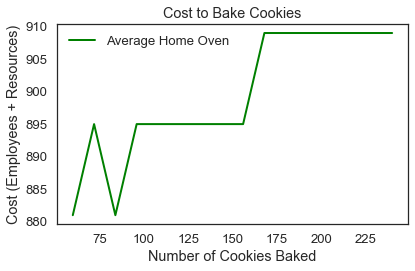

In [16]:
plot(sweep_4_point_5_mixer['Cost'], color='green', label='Average Home Oven')
decorate(xlabel='Number of Cookies Baked', 
         ylabel='Cost (Employees + Resources)',
         title='Cost to Bake Cookies (Employees + Resources)')

Note: The dip in cost around 225 is a bug in the code that I wasn't able to resolve but will long term.

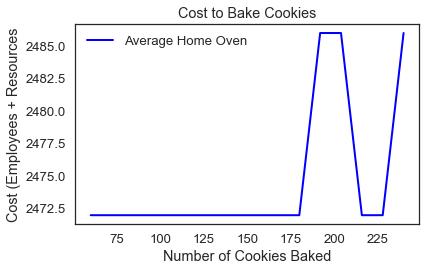

In [17]:
plot(sweep_4_point_5_mixer_big_oven['Cost'], color='blue', label='Average Home Oven')
decorate(xlabel='Number of Cookies Baked', 
         ylabel='Cost (Employees + Resources',
         title='Cost to Bake Cookies')

#### So.. will the larger more expensive oven be cheaper in the long run?  And how long will it take to recoop your initial investment for each oven?

Let's look at the profit from cookie sales using each oven and see what happens over a year.

Here are costs from both scenarios:

In [88]:
avg_oven_cost = sweep_4_point_5_mixer.loc[228]['Resource_Costs']
avg_oven_employee = sweep_4_point_5_mixer.loc[228]['Employee_Costs']
big_oven_cost = sweep_4_point_5_mixer_big_oven.loc[228]['Resource_Costs']
big_oven_employee = sweep_4_point_5_mixer_big_oven.loc[228]['Employee_Costs']

14

This function takes in the costs associated with the system (oven + mixer + employees) and the number of days you want to sell cookies for.  You also specify how much you'll sell your cookies for and how much they cost to make.

This will allow us to see if we can break even or make a profit in each scenario and how long it will take.

In [74]:
def cookie_sales(resource_costs,employee_costs,days,cookie_cost,cookie_sale_price):
    '''See how much profit will be made with 
    
    resource costs: an Integer, how much did the oven and mixer cost
    employee_costs: an Integer, how much do you pay employees total
    days: an Integer, how many days are you selling cookies for
    cookie_cost: an Integer, how much does it cost the bakery to make a single cookie
    cookie_sale_price: an Integer, how much will you sell a single cookie for
    
    return profits: an Integer, how much money the bakery made (or didnt make)
    '''
    
    #Start off with a negative profit due to equipment purchases
    profit = - resource_costs
    
    profits = TimeSeries()
    for i in linrange(1,days):
       
        if (i == 1):
            profit == profit
            
        #Assume your sales are between 178 and 228 cookies per day
        #and each day you make 228 cookies 
        cookie_sales = random.randint(108,228)
        
        cost = ((cookie_cost) * 228) + employee_costs
        sales = cookie_sale_price * cookie_sales
        profit = profit + sales - cost
        
        profits[i] = profit
        print(profits)
    
    return profits


In [68]:
avg_oven = cookie_sales(avg_oven_cost,avg_oven_employee,365,1,2.5)
big_oven = cookie_sales(big_oven_cost,big_oven_employee,365,1,2.5)

1   -682.0
dtype: float64
1   -682.0
2   -407.0
dtype: float64
1   -682.0
2   -407.0
3   -239.5
dtype: float64
1   -682.0
2   -407.0
3   -239.5
4   -124.5
dtype: float64
1   -682.0
2   -407.0
3   -239.5
4   -124.5
5    -84.5
dtype: float64
1   -682.0
2   -407.0
3   -239.5
4   -124.5
5    -84.5
6     83.0
dtype: float64
1   -682.0
2   -407.0
3   -239.5
4   -124.5
5    -84.5
6     83.0
7    298.0
dtype: float64
1   -682.0
2   -407.0
3   -239.5
4   -124.5
5    -84.5
6     83.0
7    298.0
8    378.0
dtype: float64
1   -682.0
2   -407.0
3   -239.5
4   -124.5
5    -84.5
6     83.0
7    298.0
8    378.0
9    578.0
dtype: float64
1    -682.0
2    -407.0
3    -239.5
4    -124.5
5     -84.5
6      83.0
7     298.0
8     378.0
9     578.0
10    675.5
dtype: float64
1    -682.0
2    -407.0
3    -239.5
4    -124.5
5     -84.5
6      83.0
7     298.0
8     378.0
9     578.0
10    675.5
11    728.0
dtype: float64
1    -682.0
2    -407.0
3    -239.5
4    -124.5
5     -84.5
6      83.0
7     298.0
8   

AssertionError: <class 'pandas.core.series.Series'>

#### Conclusion: 
#### The Large Oven Pays Off within 100 Days!
The Commercial Oven with 3 Racks cost over 1000 dollars more initially but pays off within about 50 days.  We can also see that based on selling cookies for 2.50 dollars with a cost to the bakery for 1.00 dollar, the bakery will profit very quickly.  

#### Over time the commercial oven is the better choice.

This obviously is an oversimplication of a bakery since rent and utilities are not taken into account, but still useful for potential bakery owners.

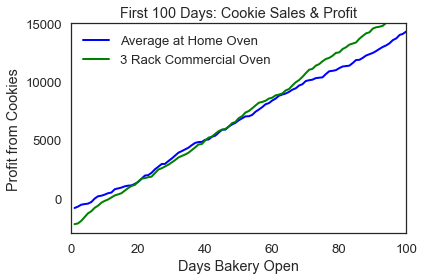

In [89]:
plot(avg_oven, color='blue', label='Average at Home Oven')
plot(big_oven, color='green', label='3 Rack Commercial Oven')
decorate(xlim=[0, 100],
         ylim=[-3000,15000],
         xlabel='Days Bakery Open', 
         ylabel='Profit from Cookies',
         title='First 100 Days: Cookie Sales & Profit')

#### Resources
Below are the resources used to research and perform this study.


##### Mixers:
4.5 Quart 10-Speed White Kitchen Aid Mixer
URL: https://www.homedepot.com/p/KitchenAid-Classic-Plus-Series-4-5-Qt-10-Speed-White-Tilt-Head-Stand-Mixer-KSM75WH/304509697?MERCH=REC-_-PLP_Browse-_-NA-_-304509697-_-N
Capacity: 5 dozen, 60 cookies
Cost to Buy: $259.99

5 Quart 10-Speed White Kitchen Aid Mixer
URL: https://www.homedepot.com/p/KitchenAid-Artisan-Designer-5-Qt-10-Speed-Candy-Apple-Red-Stand-Mixer-with-Glass-Bowl-KSM155GBCA/202546005
Capacity: 6 dozen, 66 cookies
Cost to Buy: $429.99

6 Quart 10-Speed White Kitchen Aid Mixer
URL: https://www.homedepot.com/p/KitchenAid-Classic-Plus-Series-4-5-Qt-10-Speed-White-Tilt-Head-Stand-Mixer-KSM75WH/304509697?MERCH=REC-_-PLP_Browse-_-NA-_-304509697-_-N
Capacity: 7 dozen, 84 cookies
Cost to Buy: $499.99

10 Quart
URL: https://www.webstaurantstore.com/avantco-mx10-10-qt-gear-driven-commercial-planetary-stand-mixer-with-guard-110v-3-4-hp/177MX10.html
Capacity: 10 Quart, ### dozen, ### cookies
Cost: $699.00

20 Quart
URL: https://www.webstaurantstore.com/avantco-mx20-20-qt-gear-driven-commercial-planetary-stand-mixer-with-guard-110v-1-5-hp/177MX20.html
Capacity: 20 Quart, ### dozen, ### cookies
Cost: $899.00

30 Quart
URL:https://www.webstaurantstore.com/avantco-mx30-30-qt-gear-driven-commercial-planetary-floor-mixer-with-stainless-steel-bowl-guard/177MX30.html
Capacity: 30 Quart, ### dozen, ### cookies
Cost: $1,999.00

40 Quart
URL: https://www.webstaurantstore.com/avantco-mx40-40-qt-gear-driven-commercial-planetary-floor-mixer-with-stainless-steel-bowl-guard/177MX40.html
Capacity: 40 Quart, ### dozen, ### cookies
Cost: $2,7999.00

##### Ovens
Average Home Oven
URL:https://www.homedepot.com/p/GE-30-in-5-3-cu-ft-Electric-Range-with-Self-Cleaning-Oven-in-Stainless-Steel-JB645RKSS/206942923
Capacity: 2 half size sheets, 24 cookies 
Cost: $608

Full Size Commercial Oven with 3 Racks:
URL:https://www.webstaurantstore.com/cooking-performance-group-fgc100n-single-deck-full-size-natural-gas-convection-oven-with-legs-54-000-btu/351FGC100N.html
Capacity: 3 full cookie sheets, 108 cookies
Cost: $2199.00

Double Deck Full Size Commercial Oven:
URL:https://www.webstaurantstore.com/cooking-performance-group-fgc200n-double-deck-full-size-natural-gas-convection-oven-with-legs-108-000-btu/351FGC200NK.html
Capacity 6 full cookie sheets, 216 cookies
Cost: $4359.00

##### Cookie Sheet Dimensions:
URL:https://www.jesrestaurantequipment.com/commercial-baking-sheets-size-chart.html 